In [1]:
import networkx as nx
import pandas as pd
import numpy as np
from ast import literal_eval
import matplotlib.pyplot as plt
#from textnets import Corpus, Textnet
from fa2 import ForceAtlas2
from pyvis import network as net

In [3]:
path = "data/final_df.csv"

def retweet_df(df_path):
    df = pd.read_csv(df_path, index_col=0)
    df = df[["screen_name", "name", "party", "created_at", "user_mentions"]]
    df = df.dropna(subset=["user_mentions"])
    df['user_mentions'] = df['user_mentions'].apply(literal_eval) #convert to list type
    df = df.explode("user_mentions")
    df = df.loc[df["user_mentions"].isin(df["screen_name"])].reset_index(drop = True)
    df = df.groupby(["screen_name", "user_mentions"]).size().reset_index(name = "count")
    
    return df

retweet_df = retweet_df(path)

In [48]:
#retweet_df = retweet_df.dropna(subset = ["user_mentions"])

## Create Retweet Network

In [4]:
G = nx.from_pandas_edgelist(
    retweet_df,
    source = "screen_name",
    target = "user_mentions",
    edge_attr="count", 
    create_using=nx.DiGraph())

In [5]:
forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=True,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=1.0,

                        # Performance
                        jitterTolerance=1.0,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=1.2,
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=2.0,
                        strongGravityMode=False,
                        gravity=1.0,

                        # Log
                        verbose=True)

100%|██████████| 100/100 [00:00<00:00, 1249.24it/s]


BarnesHut Approximation  took  0.02  seconds
Repulsion forces  took  0.05  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


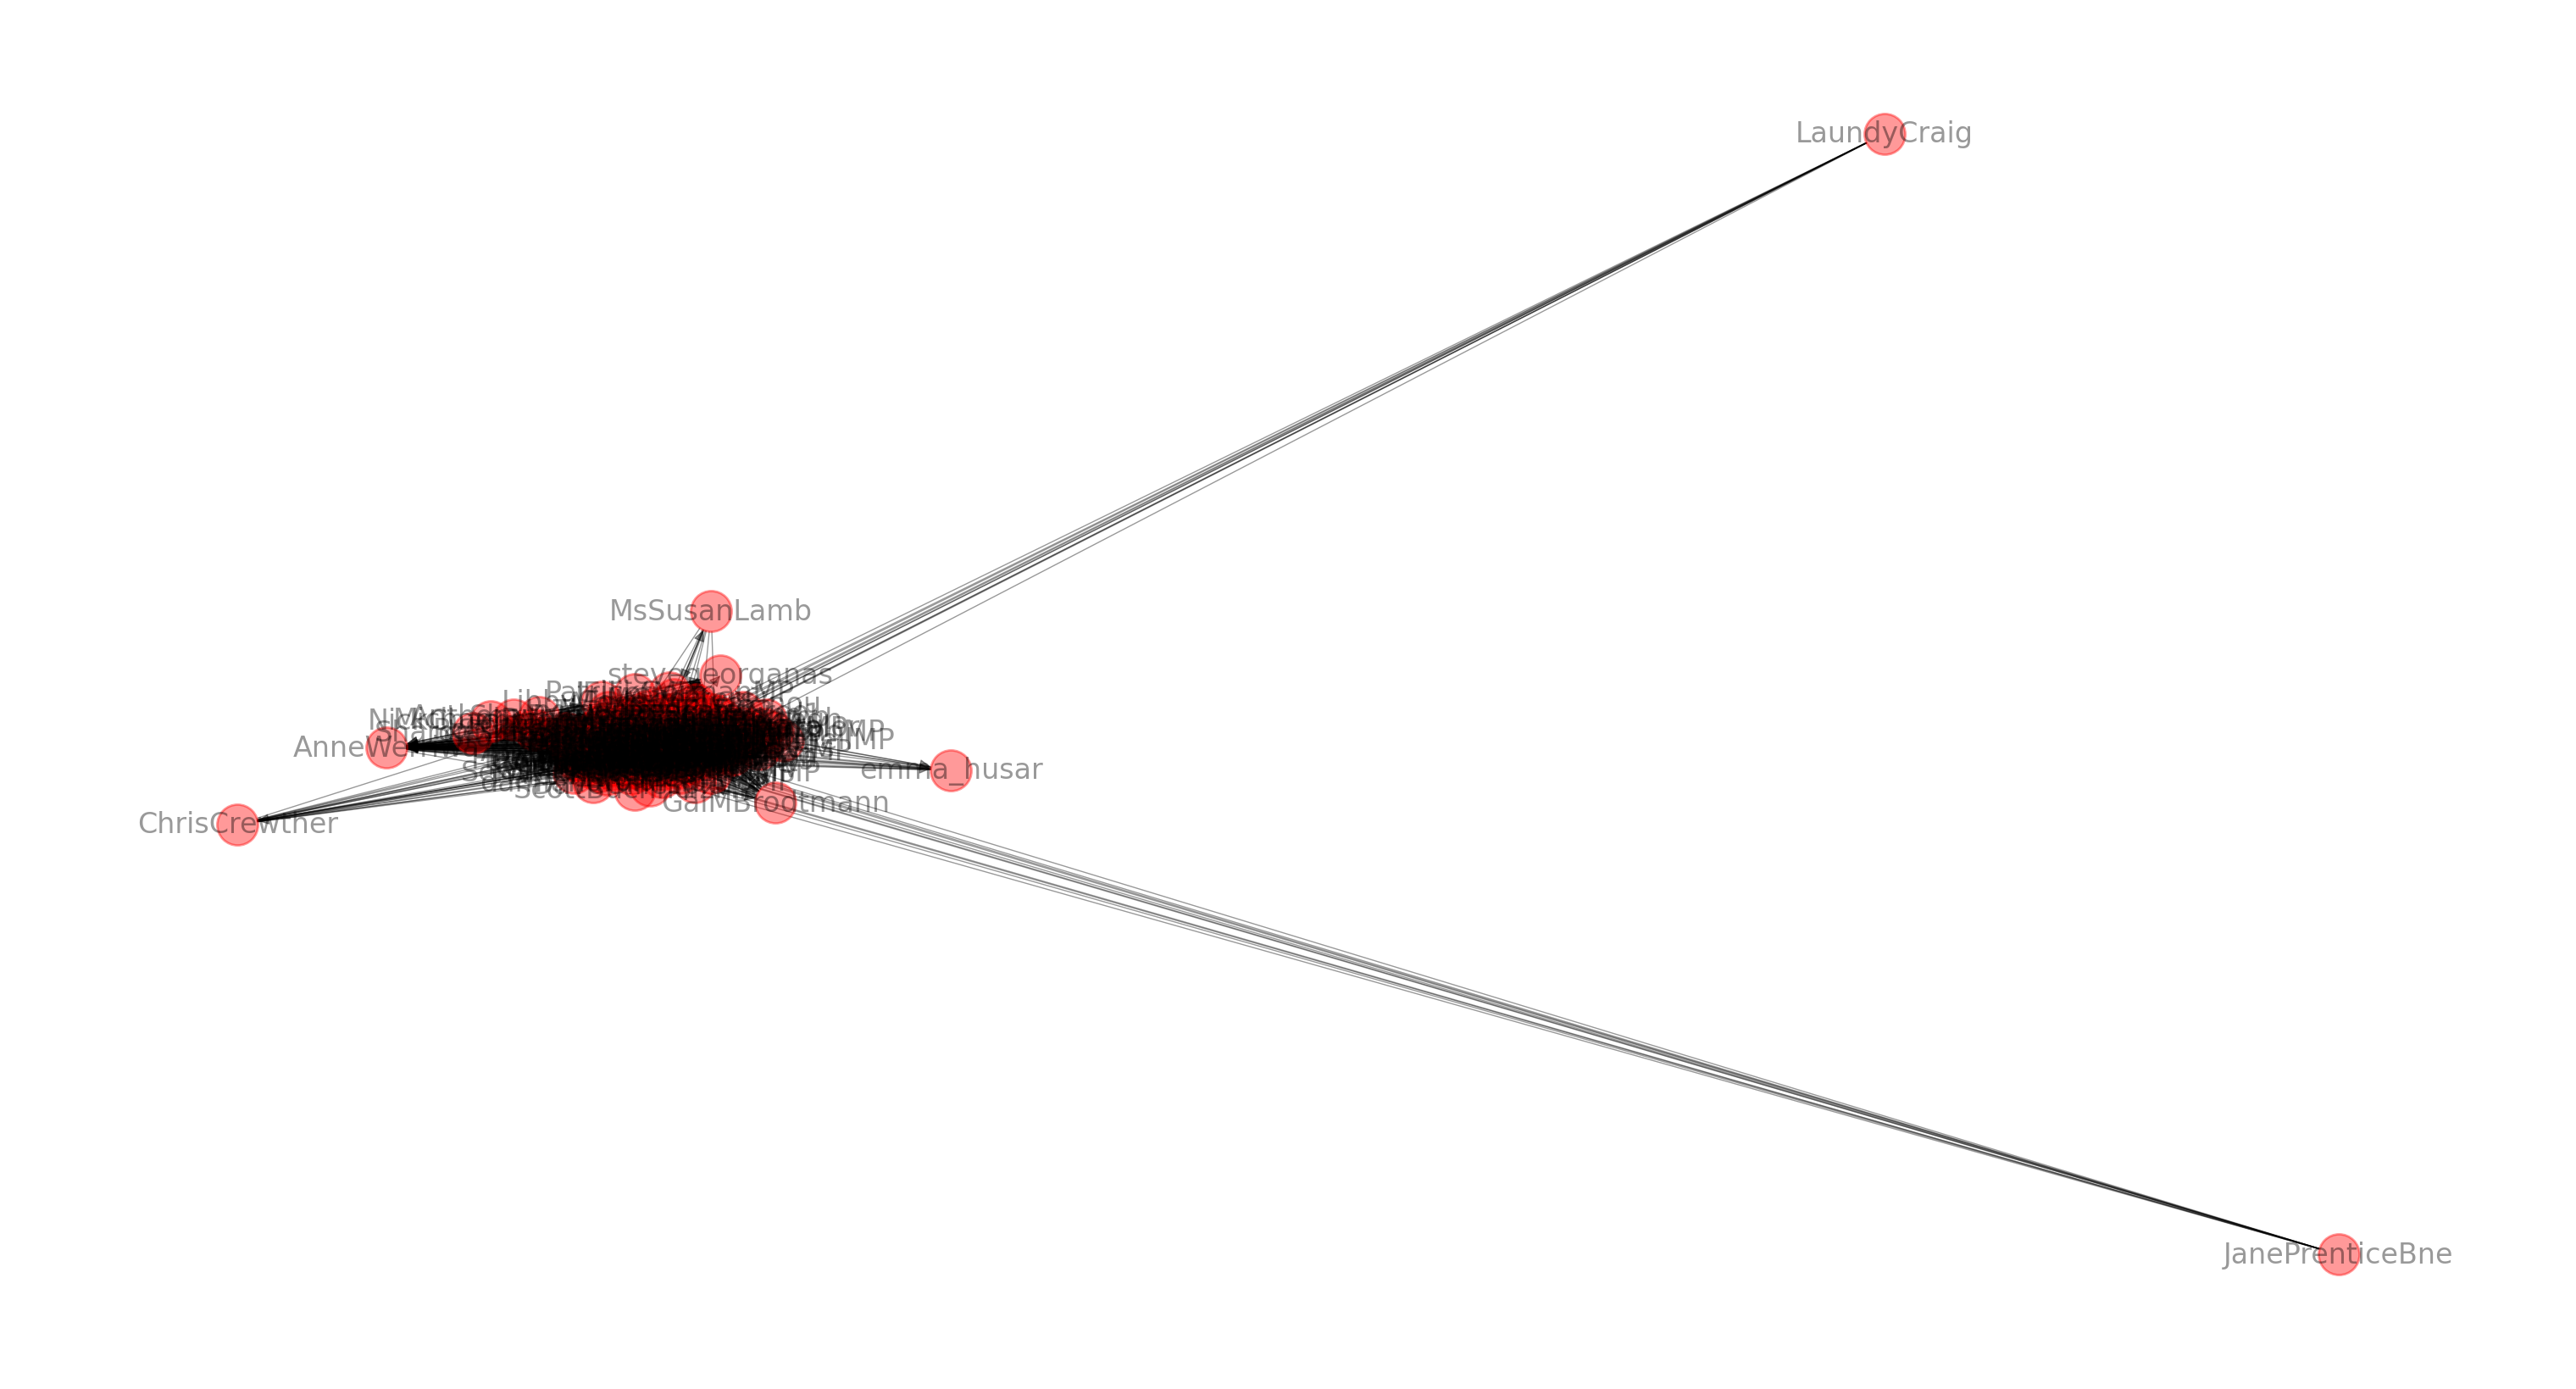

In [6]:
plt.figure(dpi=200, figsize = (15,8))

pos = forceatlas2.forceatlas2_networkx_layout(G)

options = {
    'node_color': 'red',
    'width': 0.5,
    'alpha':0.4,
    'with_labels':True,
    'pos':pos,}
    #'node_size':[s*100 for s in id_c.values()]
   # }

nx.draw(G, **options)
plt.show()

In [77]:
# Create nodelist
a1 = retweet_df["screen_name"].tolist()
a2 = retweet_df["user_mentions"].tolist()
node_list = list(set(a1 + a2))

# Edgedata as tuples
tuples = [tuple(x) for x in retweet_df[["screen_name","user_mentions", "count"]].values]

# Create network
nt = net.Network(notebook=True,
                     height = "700px",
                     width = "700px",
                     bgcolor = "#f6f2e9")

# Add nodes and edges to network
for i in node_list:
    nt.add_node(i, title=i)
nt.add_edges(tuples)

nt.force_atlas_2based()

# Save and show
nt.show('retweet_network.html')